In [1]:
# First, let's load the data and inspect it.

import pandas as pd

# Load power data
power_data = pd.read_csv('C:/Users/ML/energyforecast/power_usage_2016_to_2020.csv')

# Load weather data
weather_data = pd.read_csv('C:/Users/ML/energyforecast/weather_2016_2020_daily.csv')

power_data.head(), weather_data.head()


(             StartDate  Value (kWh)  day_of_week    notes
 0  2016-01-06 00:00:00        1.057            2  weekday
 1  2016-01-06 01:00:00        1.171            2  weekday
 2  2016-01-06 02:00:00        0.560            2  weekday
 3  2016-01-06 03:00:00        0.828            2  weekday
 4  2016-01-06 04:00:00        0.932            2  weekday,
          Date  Day  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
 0  2016-01-06    1        85      74.8        68       74     71.4       66   
 1  2016-02-06    2        76      71.2        66       74     70.3       66   
 2  2016-03-06    3        79      72.1        68       72     70.0       68   
 3  2016-04-06    4        76      71.2        69       73     70.0       66   
 4  2016-05-06    5        82      73.8        68       72     70.0       68   
 
    Hum_max  Hum_avg  Hum_min  Wind_max  Wind_avg  Wind_min  Press_max  \
 0      100     89.4       65        21       9.5         0       29.8   
 1      100    

In [2]:
# Convert 'StartDate' and 'Date' to datetime format
power_data['StartDate'] = pd.to_datetime(power_data['StartDate'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Aggregate power data to daily level
power_data_daily = power_data.resample('D', on='StartDate').sum()

# Reset index to make 'StartDate' a column again
power_data_daily.reset_index(inplace=True)

# Merge power and weather data
merged_data = pd.merge(power_data_daily, weather_data, left_on='StartDate', right_on='Date', how='inner')

# Drop redundant columns ('Day' from weather data and 'day_of_week_y' as we have 'day_of_week_x' from power data)
merged_data.drop(columns=['Day', 'day_of_week_y'], inplace=True)

# Rename 'day_of_week_x' to 'day_of_week' and 'Value (kWh)' to 'Power_kWh'
merged_data.rename(columns={'day_of_week_x': 'day_of_week', 'Value (kWh)': 'Power_kWh'}, inplace=True)

merged_data.head()


,StartDate,Power_kWh,day_of_week,notes,Date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,...,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,2016-01-06,29.691,48,weekdayweekdayweekdayweekdayweekdayweekdayweek...,2016-01-06,85,74.8,68,74,71.4,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
1,2016-01-07,43.177,72,weekdayweekdayweekdayweekdayweekdayweekdayweek...,2016-01-07,94,84.9,76,76,74.0,...,94,71.6,51,13,5.7,0,29.9,29.9,29.8,0.00
2,2016-01-08,50.057,96,weekdayweekdayweekdayweekdayweekdayweekdayweek...,2016-01-08,97,86.5,75,76,73.3,...,96,67.3,37,20,6.0,0,30.0,29.9,29.9,0.00
3,2016-01-09,47.363,120,weekendweekendweekendweekendweekendweekendweek...,2016-01-09,96,86.2,78,75,73.3,...,88,67.1,46,13,6.3,0,29.8,29.8,29.7,0.01
4,2016-01-10,42.203,144,weekendweekendweekendweekendweekendweekendweek...,2016-01-10,81,71.1,61,64,59.4,...,90,68.7,45,8,3.3,0,30.0,29.9,29.9,0.00


In [3]:
# Check for missing values
missing_values = merged_data.isnull().sum()

# Descriptive statistics for numerical columns
desc_stats = merged_data.describe()

missing_values, desc_stats


(StartDate      0
 Power_kWh      0
 day_of_week    0
 notes          0
 Date           0
 Temp_max       0
 Temp_avg       0
 Temp_min       0
 Dew_max        0
 Dew_avg        0
 Dew_min        0
 Hum_max        0
 Hum_avg        0
 Hum_min        0
 Wind_max       0
 Wind_avg       0
 Wind_min       0
 Press_max      0
 Press_avg      0
 Press_min      0
 Precipit       0
 dtype: int64,
                            StartDate    Power_kWh  day_of_week  \
 count                           1550  1550.000000  1550.000000   
 mean   2018-07-15 00:49:14.322580480    20.681241    69.522581   
 min              2016-01-06 00:00:00     0.000000     0.000000   
 25%              2017-06-23 06:00:00    10.493250    24.000000   
 50%              2018-07-15 12:00:00    16.312000    72.000000   
 75%              2019-08-06 18:00:00    29.883500   120.000000   
 max              2020-12-06 00:00:00    78.225300   144.000000   
 std                              NaN    13.005544    48.926439   
 
  

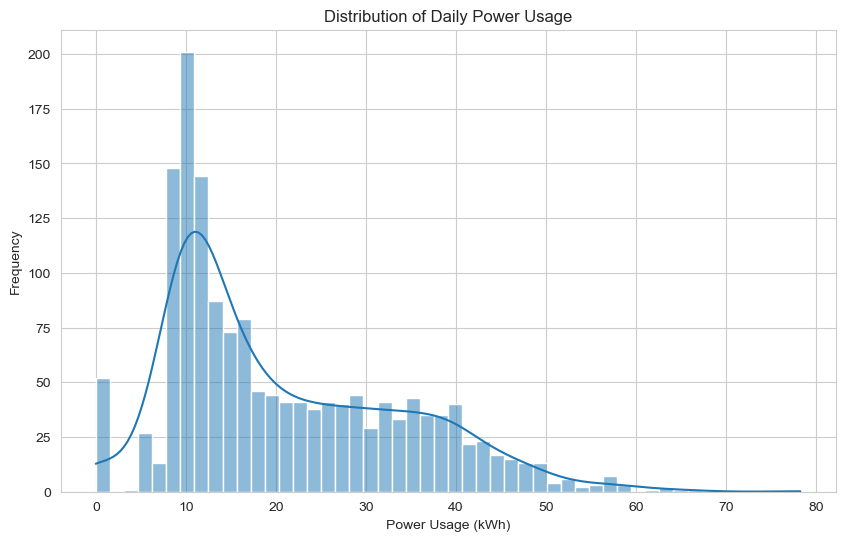

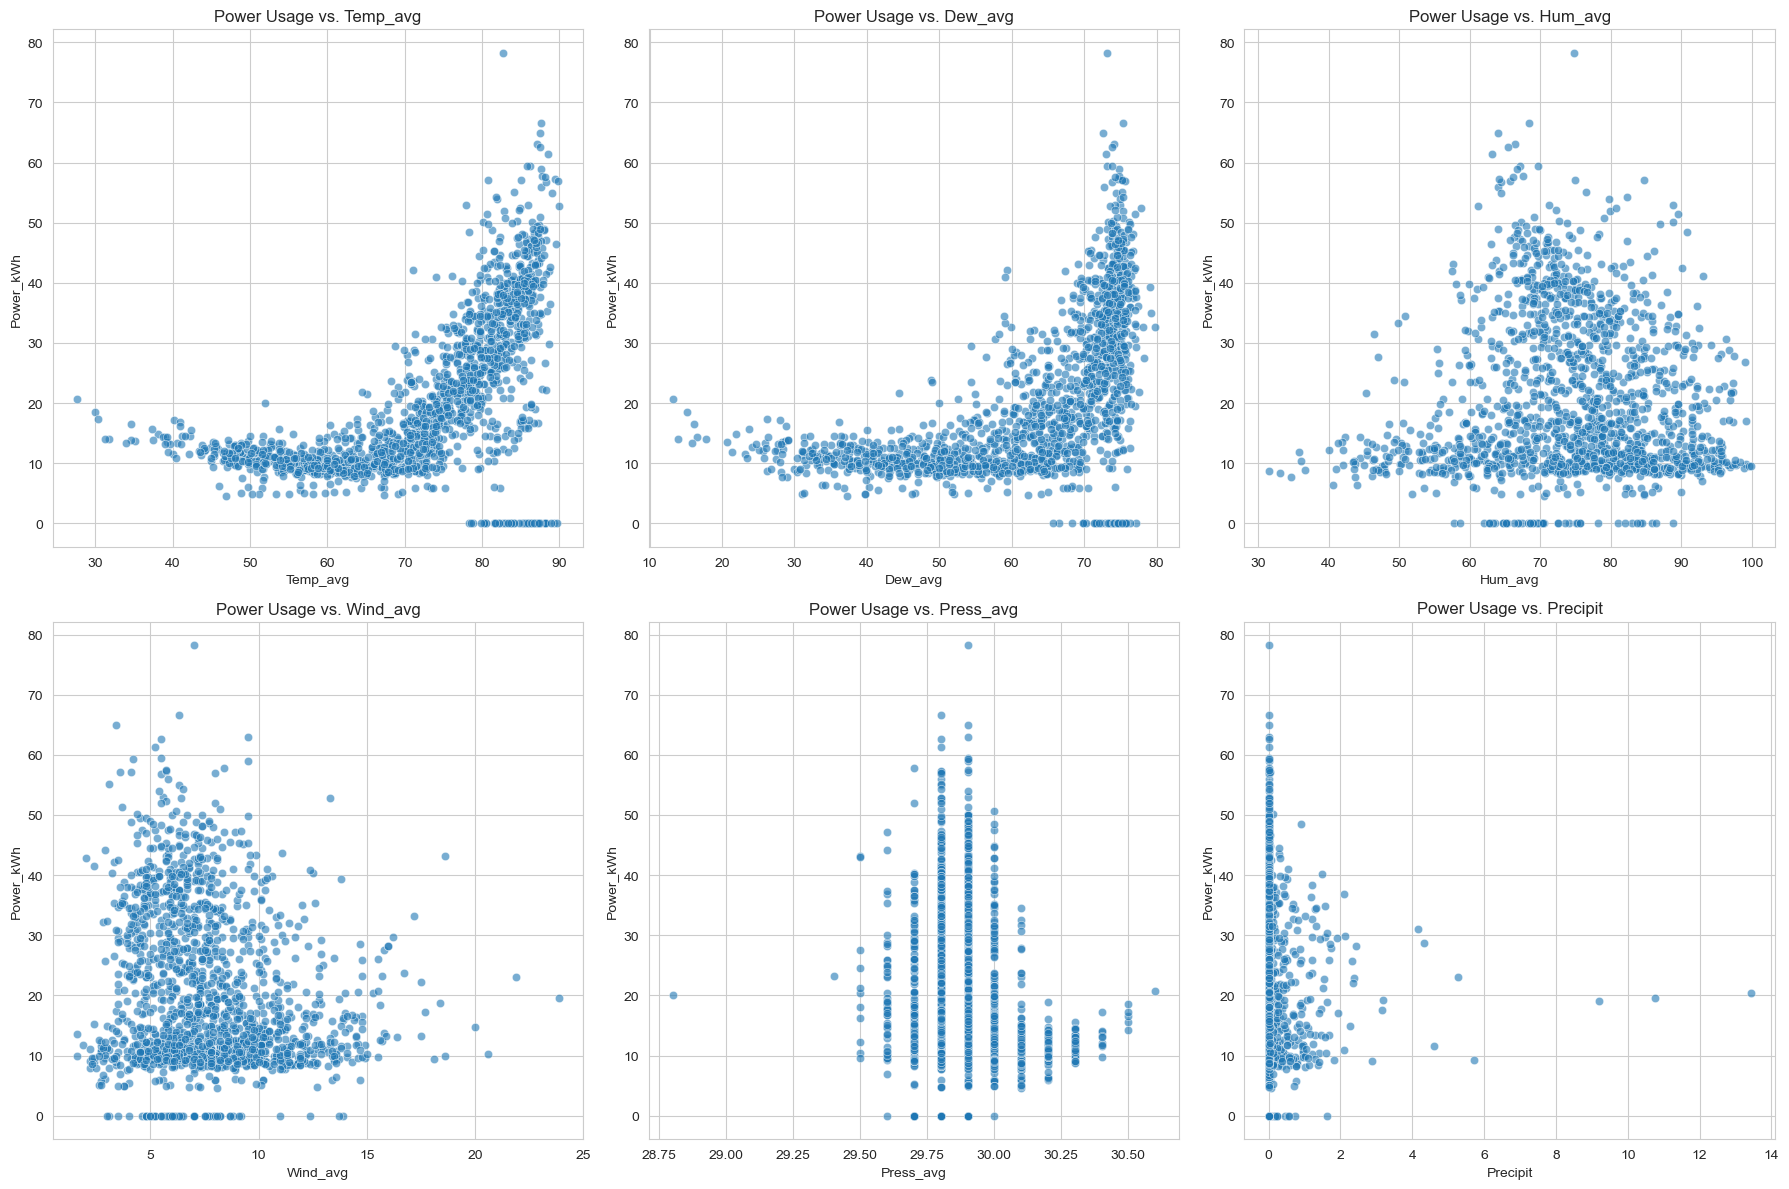

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot histogram of daily power usage
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Power_kWh'], bins=50, kde=True)
plt.title('Distribution of Daily Power Usage')
plt.xlabel('Power Usage (kWh)')
plt.ylabel('Frequency')
plt.show()

# Select some weather variables to check their relationship with power usage
weather_variables = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg', 'Precipit']

# Create scatter plots of power usage vs. weather variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axs = axs.flatten()  # Flatten to 1D array

for i, var in enumerate(weather_variables):
    sns.scatterplot(data=merged_data, x=var, y='Power_kWh', ax=axs[i], alpha=0.6)
    axs[i].set_title(f'Power Usage vs. {var}')
    
plt.tight_layout()
plt.show()


In [5]:
# Compute correlation coefficients of power usage with weather variables
correlations = merged_data[['Power_kWh'] + weather_variables].corr()

# Display correlation with power usage
correlations_with_power = correlations['Power_kWh'].sort_values(ascending=False)

# Create lag features for power usage
merged_data['Power_lag1'] = merged_data['Power_kWh'].shift(1)
merged_data['Power_lag2'] = merged_data['Power_kWh'].shift(2)
merged_data['Power_lag3'] = merged_data['Power_kWh'].shift(3)

# Drop the first 3 rows because they have missing lag features
merged_data = merged_data.iloc[3:]

correlations_with_power, merged_data.head()


(Power_kWh    1.000000
 Temp_avg     0.615934
 Dew_avg      0.551622
 Hum_avg     -0.005774
 Precipit    -0.023644
 Wind_avg    -0.180944
 Press_avg   -0.250923
 Name: Power_kWh, dtype: float64,
    StartDate  Power_kWh  day_of_week  \
 3 2016-01-09     47.363          120   
 4 2016-01-10     42.203          144   
 5 2016-01-11     21.535            0   
 6 2016-01-12     12.981           24   
 7 2016-02-06     28.789          120   
 
                                                notes       Date  Temp_max  \
 3  weekendweekendweekendweekendweekendweekendweek... 2016-01-09        96   
 4  weekendweekendweekendweekendweekendweekendweek... 2016-01-10        81   
 5  weekdayweekdayweekdayweekdayweekdayweekdayweek... 2016-01-11        82   
 6  weekdayweekdayweekdayweekdayweekdayweekdayweek... 2016-01-12        65   
 7  weekendweekendweekendweekendweekendweekendweek... 2016-02-06        76   
 
    Temp_avg  Temp_min  Dew_max  Dew_avg  ...  Wind_max  Wind_avg  Wind_min  \
 3      

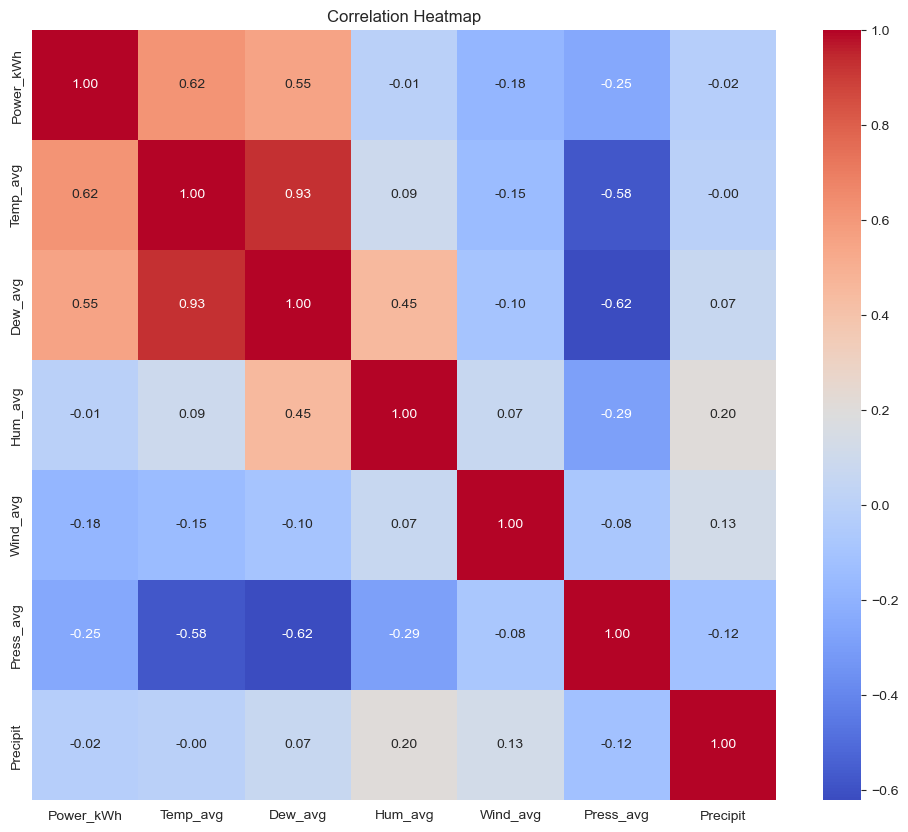

In [6]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


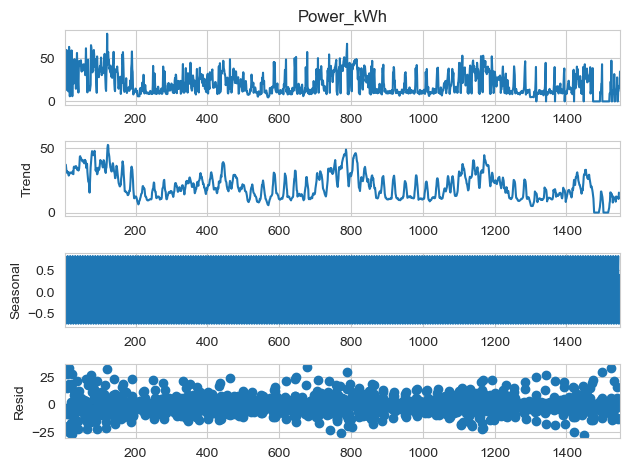

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform additive decomposition with period=7
decomposition = seasonal_decompose(merged_data['Power_kWh'], model='additive', period=7)

# Plot the original data, the trend, the seasonality, and the residuals 
decomposition.plot()
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(merged_data['Power_kWh'])

# Print test statistic and p-value
adf_statistic = adf_result[0]
adf_pvalue = adf_result[1]

adf_statistic, adf_pvalue


(-3.3584944894570214, 0.012457836898292511)

In [10]:
# Split the data into training and test sets
# We'll use the last 365 days of data for testing

train_data = merged_data[:-365]
test_data = merged_data[-365:]

# Select features for modeling
# We'll use the weather variables and the lag features

feature_columns = weather_variables + ['day_of_week', 'Power_lag1', 'Power_lag2', 'Power_lag3']

X_train = train_data[feature_columns]
y_train = train_data['Power_kWh']

X_test = test_data[feature_columns]
y_test = test_data['Power_kWh']

X_train.shape, X_test.shape


((1182, 10), (365, 10))

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
# Initialize XGBoost model with new parameters
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Compute RMSE of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse


13.541792715203322

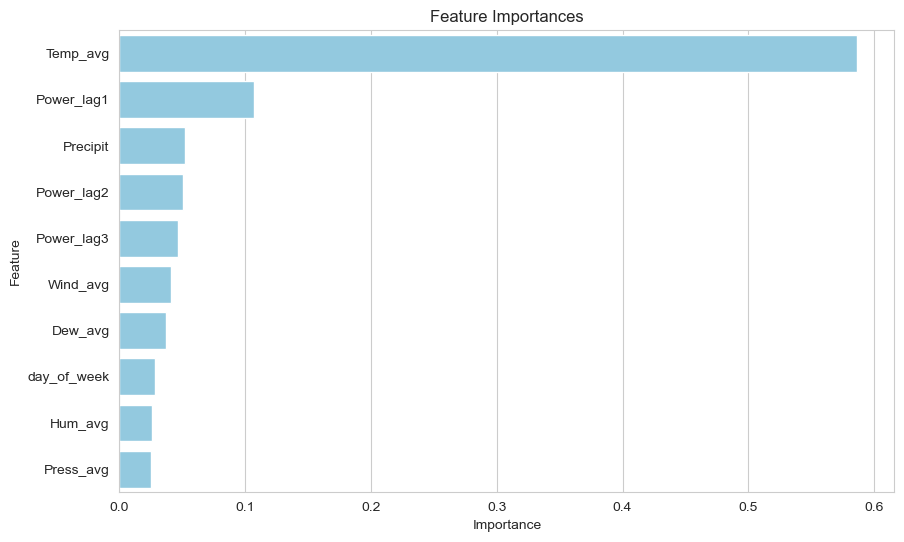

In [13]:
# Extract feature importances
feature_importances = xgb_model.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
